In [2]:
import cv2
import os
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [22]:
def extract_shape_features(image, plot_graph=False):
    kernel_size = 5
    transform_iteration = 5

    # Define the kernel
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    image = cv2.resize(image, (224, 224))   # TODO: Decide if dataloader or feature extraction do

    image_dict = {}
    image_dict["original_image"] = image
    image_dict["eroded_image"] = cv2.erode(image_dict["original_image"], kernel, iterations=transform_iteration)
    image_dict["dilated_image"] = cv2.dilate(image_dict["original_image"], kernel, iterations=transform_iteration)
    image_dict["opened_image"] = cv2.dilate(image_dict['eroded_image'], kernel, iterations=transform_iteration)
    image_dict["closed_image"] = cv2.erode(image_dict['dilated_image'], kernel, iterations=transform_iteration)

    if plot_graph:
        plt.figure(figsize=(16, 10))

        plot_count = 1
        for title, img in image_dict.items():
            plt.subplot(2, 3, plot_count)
            plt.imshow(img, cmap='gray')
            plt.title(title)
            plt.axis('off')
            plot_count += 1

        plt.show()

    return [img for img in image_dict.values()]

Real Image


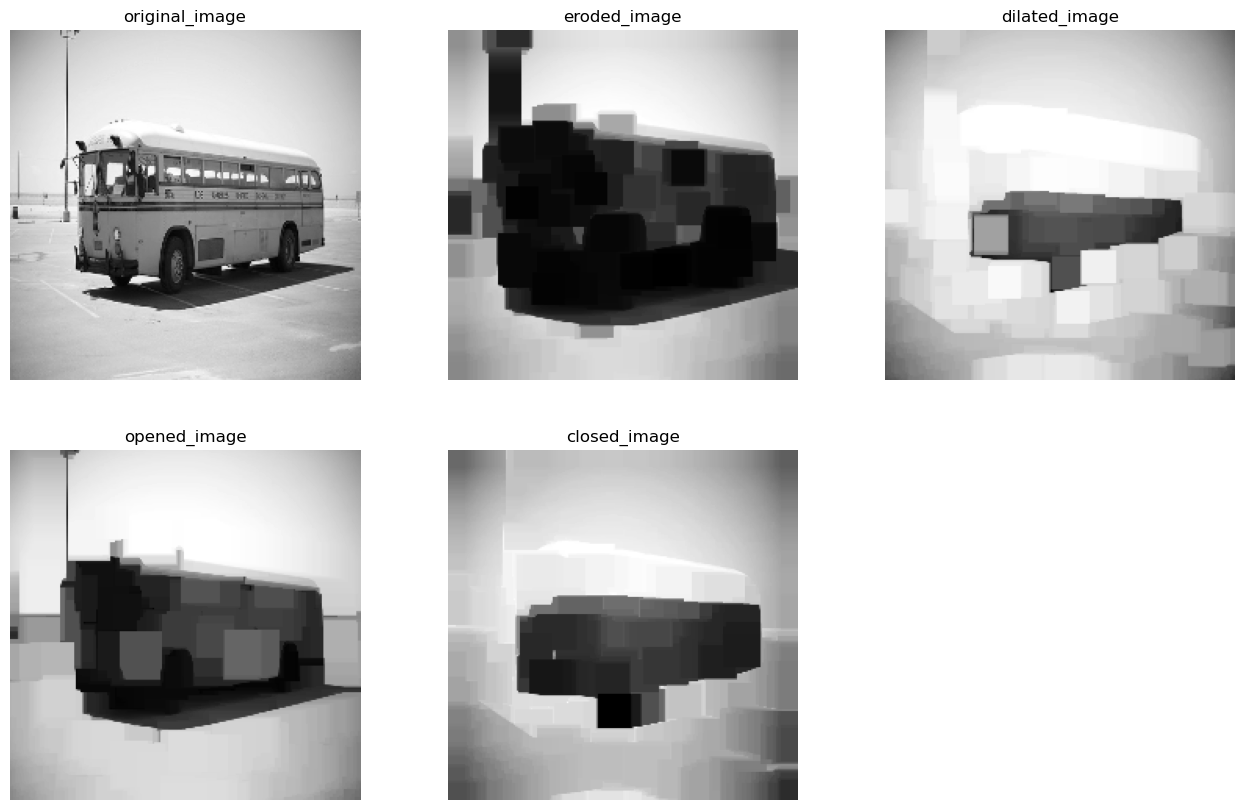

AI Generated Image


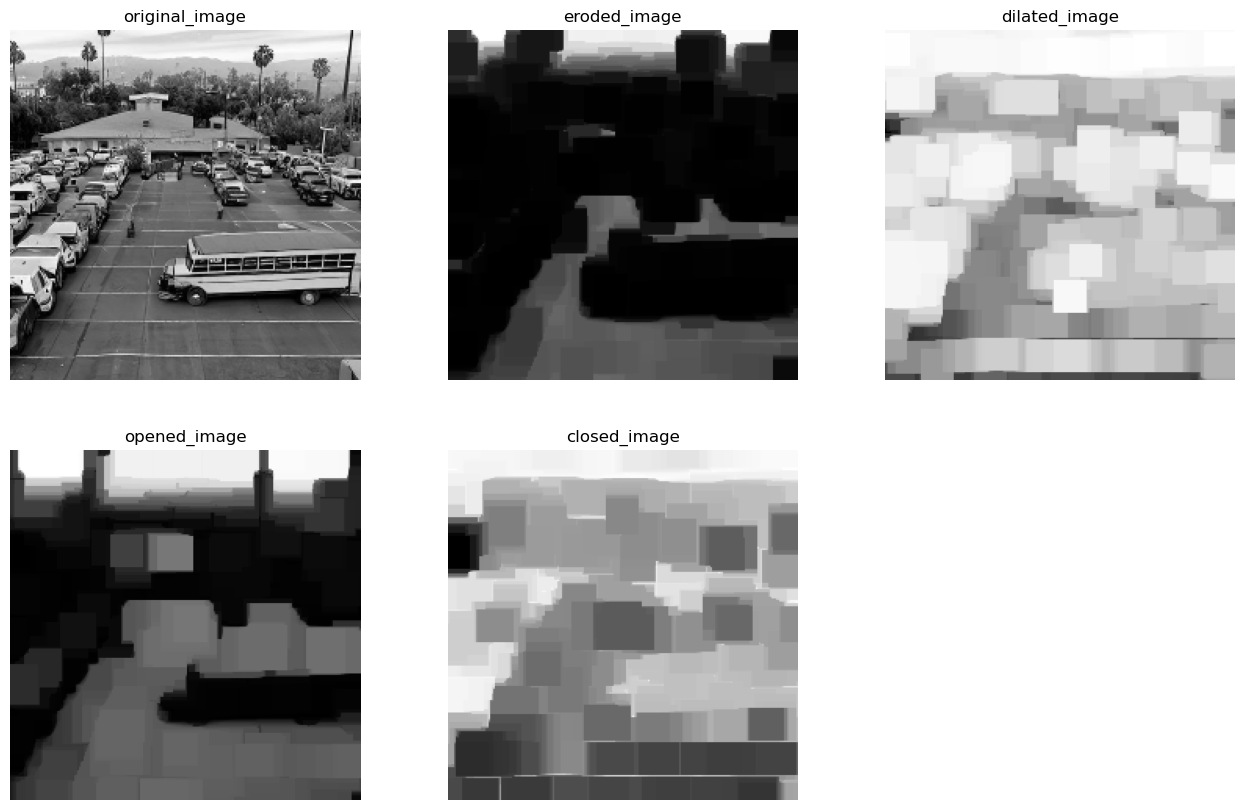

In [23]:

img_path = os.getcwd() + r'\AIGC-Detection-Dataset\train\0_real\000000000471.jpg'

# Real Image
print("Real Image")
image = io.imread(img_path, as_gray=True)
real_images = extract_shape_features(image, True)

# AI Generated Image
print("AI Generated Image")
image = io.imread(img_path.replace("0_real", "1_fake"), as_gray=True)
ai_images = extract_shape_features(image, True)

